In [12]:
import pyvisa as visa
from time import sleep
import matplotlib.pyplot as plt
import numpy as np

rm = visa.ResourceManager()
## uncomment the following if full address not known
# instruments = rm.list_resources() 
# usb = list(filter(lambda x: 'USB' in x, instruments))
SSA = rm.open_resource('TCPIP::192.168.169.131::INSTR')
print(SSA.query("*IDN?"))

Siglent Technologies,SSA3032X-R,SSA5PA1Q800415,3.2.2.6.0R10



In [13]:
freq_cen = 1.6 # GHz
freq_span = 0 # MHz
RBM_AUTO = 1 #1-ON, 0-OFF
VID_AUTO = 1 #1-ON, 0-OFF
SWE_AUTO = 0 #1-ON, 0-OFF
VID_RBM_RAT = 2 
RBM = 10 #kHz
VID = 10 #kHz
SWE_TIME = 100 #ms

In [14]:
SSA.write("SENS:FREQ:CENT " +  str(freq_cen) + " GHz")
SSA.write("SENS:FREQ:SPAN " +  str(freq_span) + " MHz")
SSA.write("SENS:BWID:AUTO " + str(RBM_AUTO))
SSA.write("SENS:BWID:VID:AUTO " + str(VID_AUTO))
SSA.write("SENS:SWE:TIME:AUTO " + str(SWE_AUTO))
SSA.write("SNES:BWID:VID " + str(RBM) + " kHz")
SSA.write("SNES:BWID " + str(RBM) + " kHz")
SSA.write("SENS:BWID:VID:RAT " + str(VID_RBM_RAT) )
SSA.write("SENS:SWE:TIME " + str(SWE_TIME) + " ms")
SSA.write("UNIT:POW V")

12

In [15]:
print(SSA.query("SENS:FREQ:CENT?"))
print(SSA.query("SENS:FREQ:SPAN?"))
print(SSA.query("SENS:FREQ:OFFS?"))
print(SSA.query("SENS:BWID:AUTO?"))
print(SSA.query("SENS:BWID:VID:AUTO?"))
print(SSA.query("SENS:SWE:TIME:AUTO?"))
print(SSA.query("SENS:BWID?"))
print(SSA.query("SENS:BWID:VID?"))
print(SSA.query("SENS:BWID:VID:RAT?"))
print(SSA.query("SENS:SWE:TIME?"))
print(SSA.query("FORM?"))
print(SSA.query("UNIT:POW?"))

1.60000000000E+09

0.00000000000E+00

0.00000000000E+00

1

1

0

3.000000000E+06

1.000000000E+07

3.000000000E+00

1.000000000E-01

ASCii

V



In [16]:
SSA.write("TRAC:DATA?")
data_str=SSA.read().split(",")
data_pow = [float(s)*10**3 for s in data_str]

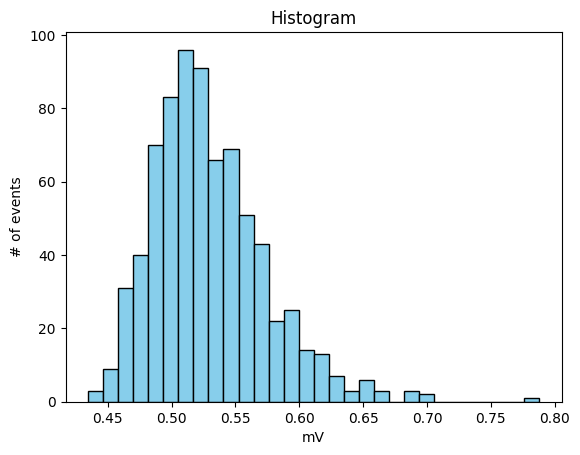

mean(V) 0.5294926527296937
std(V) 0.04452669564433496
std(V)/mean(V) 0.0840931321988822


In [17]:
plt.hist(data_pow, bins=30, color='skyblue', edgecolor='black')


plt.title('Histogram')
plt.xlabel('mV')
plt.ylabel('# of events')
plt.show()

print("mean(V) " + str(np.mean(data_pow)))
print("std(V) " + str(np.std(data_pow)))
print("std(V)/mean(V) " + str(np.std(data_pow)/np.mean(data_pow)))